<a href="https://colab.research.google.com/github/wooihaw/ai_with_python_2025/blob/main/handson_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hands-on 5
### Clustering
#### Construct a model to group the truck drivers
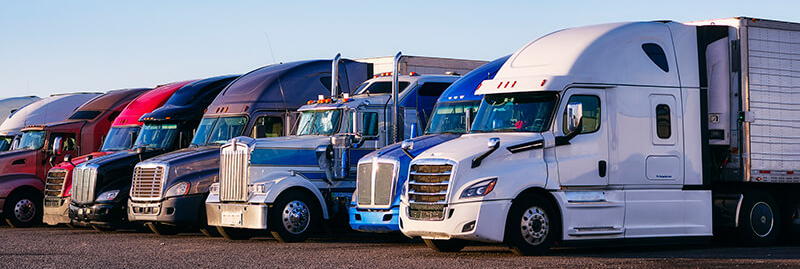

In [ ]:
# Initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read dataset
df = pd.read_csv('https://raw.githubusercontent.com/wooihaw/ai_with_python_2024/main/drivers.csv', sep='\t', header=0)

# Store features (Column 1 & 2)
X = df.drop(columns=['Driver_ID'])

# Apply k-mean clustering with 2 clusters
km = KMeans(n_clusters=2, n_init=10).fit(X)

markers = ('rs', 'ro')
for i, m in enumerate(markers):
    plt.plot(km.cluster_centers_[i][0], km.cluster_centers_[i][1], m, label=i)
plt.scatter(X['Distance_Feature'], X['Speeding_Feature'], c=km.labels_)
plt.legend(loc='best')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.show()

**To do:**
- To group the truck drivers into 4 clusters and label the data samples according to their cluster

In [ ]:
# Apply k-mean clustering with 4 clusters
km = KMeans(n_clusters=4, n_init=10).fit(X)

markers = ('rs', 'ro', 'r*', 'r^')
for i, m in enumerate(markers):
    plt.plot(km.cluster_centers_[i][0], km.cluster_centers_[i][1], m, label=i)
plt.scatter(X['Distance_Feature'], X['Speeding_Feature'], c=km.labels_)
plt.legend(loc='best')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.show()

**To do:**
- Add labels to df and save it as a CSV file

In [ ]:
df["Label"] = km.labels_
df["Label"] = df["Label"].map({0:"Slow_Interstate", 1:"Slow_City", 2:"Fast_Interstate", 3:"Fast_City"})
df.sample(5)

**To do:**
- Create a k-NN model to classify the drivers
- Evaluate the performance of the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split

X = df.drop(columns=["Label"])
y = df["Label"]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier().fit(X_train, y_train)
print(f"knn accuracy: {knn.score(X_test, y_test):.3%}")